In [1]:
from nilearn import image, plotting
from matplotlib import pyplot as plt
import numpy as np 
from scipy import stats

/home/tomas/Desktop/diploma-thesis/neuron/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
img = image.smooth_img('example.nii',None)

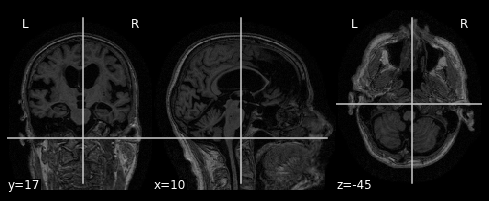

In [3]:
plotting.plot_anat(img)

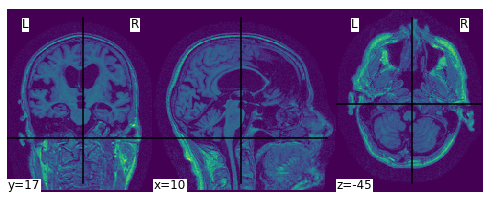

In [4]:
plotting.plot_img(img)

In [5]:
raw_data = img.get_data()

### Draw by layers

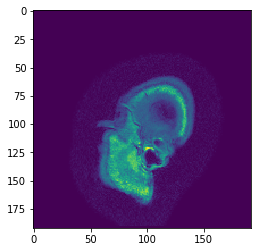

In [6]:
plt.imshow(raw_data[:,:,21])

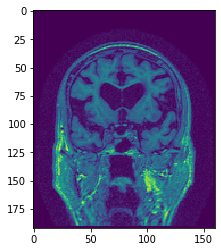

In [7]:
plt.imshow(raw_data[:,80,:])

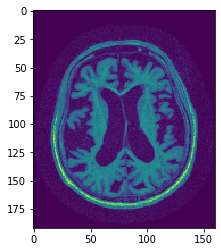

In [8]:
plt.imshow(raw_data[80,:,:])

In [9]:
!ls 


actual_papers  example.nii  HelloNeuron.ipynb  neuron  OASIS2


In [10]:
img2 = image.smooth_img('OASIS2/OAS2_0002_MR3/1/123127142/mpr-1.nifti.img',None)

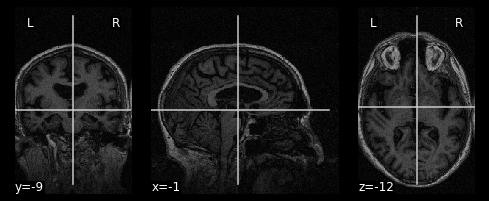

In [11]:
plotting.plot_anat(img2)

In [12]:
from os import walk

In [13]:
imgs = {}
for  (dirpath, dirnames, filenames) in walk("OASIS2"): 
    for i in filenames: 
        if i.endswith(".img"):
            name = dirpath + "/" + i
            group = dirpath.split("/")[1].split("_")[-1][-1]
            session = dirpath.split("/")[-2]
            date = dirpath.split("/")[-1]
            imgs[name] = {
                "img" : image.smooth_img(name, None), 
                "group" : group,
                "session" : session,
                "date" : date,
                "data" : image.smooth_img(name, None).get_data()
            }

In [14]:
data = [ v["data"] for _, v in imgs.items()]
data = list(filter(lambda x: x.shape == (256, 256, 128, 1), data))

In [15]:
voxel_dist = np.stack(data, axis=-1)

In [16]:
imgs['OASIS2/OAS2_0001_MR2/1/123127131/mpr-1.nifti.img']["data"].shape

(256, 256, 128, 1)

In [17]:
import seaborn as sns


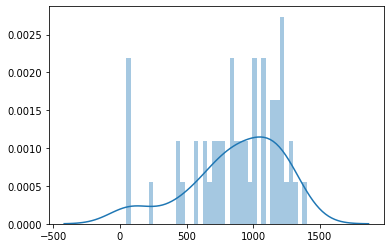

In [18]:
sns.distplot(voxel_dist[80][80][80][0], bins=40)
#stats.entropy(voxel_dist[80][60][60][0])

In [19]:
stats.entropy(voxel_dist[30][0][0][0])

3.842313

In [20]:
np.min(voxel_dist[0][0][0][0])

0.0

In [21]:
voxel_dist.shape

(256, 256, 128, 1, 54)

In [22]:
voxel_dist.shape

(256, 256, 128, 1, 54)

In [24]:
voxel_entropy = np.apply_over_axes(, voxel_dist,[-1] )

In [31]:
stats.entropy([0, 0])

/home/tomas/Desktop/diploma-thesis/neuron/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2614: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=0)


nan